In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [128]:
df = pd.read_csv(r'C:\Users\jerlu\Downloads\archive (1)\credit_card_fraud_detection.csv')
df.head()

,Transaction ID,User ID,Transaction Amount,Transaction Date,Merchant Name,Merchant Category,Country,Card Type,Fraudulent,Transaction Method,User Age,User Gender,Account Balance,Transaction Time,Transaction Location
0,T00001,U0001,21.62,2022-10-19,Walmart,Health & Wellness,USA,Credit,No,Online,71,Non-Binary,25786.02,08:27,Rural
1,T00002,U0002,76.66,2023-03-10,Apple Store,Health & Wellness,India,Prepaid,No,Online,80,Non-Binary,25347.05,17:58,Suburban
2,T00003,U0003,494.52,2023-01-14,Best Buy,Retail,Germany,Credit,No,In-Store,48,Male,38215.24,09:28,Rural
3,T00004,U0004,300.03,2023-11-04,Apple Store,Travel,Australia,Credit,Yes,ATM Withdrawal,70,Male,34663.70,09:00,Urban
4,T00005,U0005,746.05,2023-05-12,Starbucks,Electronics,South Africa,Debit,No,Online,30,Male,8763.38,03:24,Suburban


In [129]:
print(df.isnull().sum())
df.describe()

Transaction ID          0
User ID                 0
Transaction Amount      0
Transaction Date        0
Merchant Name           0
Merchant Category       0
Country                 0
Card Type               0
Fraudulent              0
Transaction Method      0
User Age                0
User Gender             0
Account Balance         0
Transaction Time        0
Transaction Location    0
dtype: int64


,Transaction Amount,User Age,Account Balance
count,300.000000,300.000000,300.000000
mean,501.907600,49.060000,24249.933900
std,292.537163,18.080729,13874.290128
min,1.050000,18.000000,163.650000
25%,258.765000,33.000000,13406.817500
50%,495.720000,48.500000,23760.935000
75%,753.155000,63.250000,35896.167500
max,995.400000,80.000000,49823.820000


In [130]:
df["Merchant Name"].unique()

array(['Walmart', 'Apple Store', 'Best Buy', 'Starbucks', 'Amazon',
       'Uber', 'Target', 'Shell', 'Costco', 'eBay'], dtype=object)

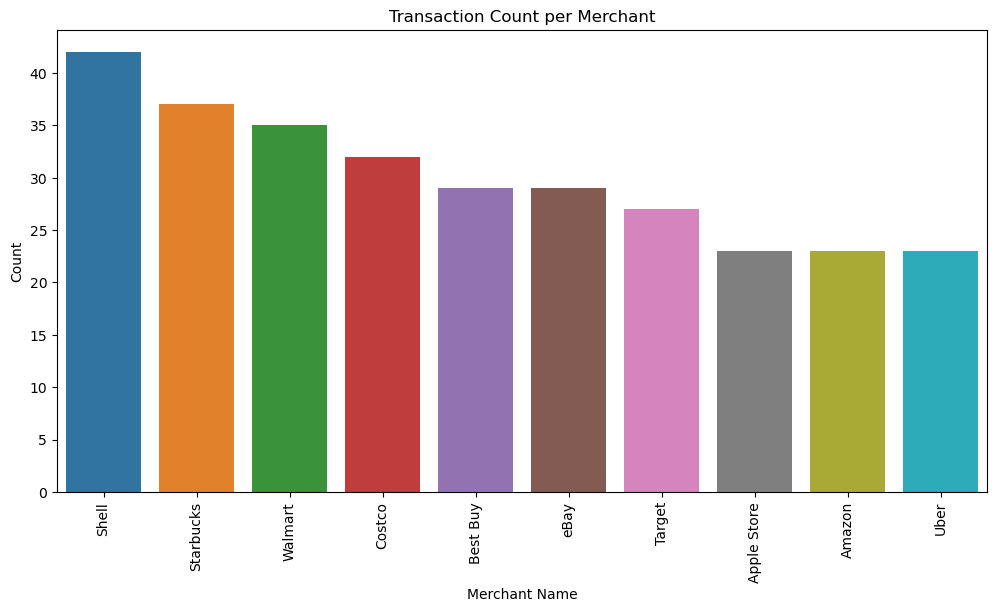

In [131]:
merchant_counts = df['Merchant Name'].value_counts().reset_index()
merchant_counts.columns = ['Merchant Name', 'Count']

plt.figure(figsize=(12, 6))
sns.barplot(x="Merchant Name", y="Count", data=merchant_counts)
plt.xticks(rotation=90)
plt.title("Transaction Count per Merchant")
plt.show()

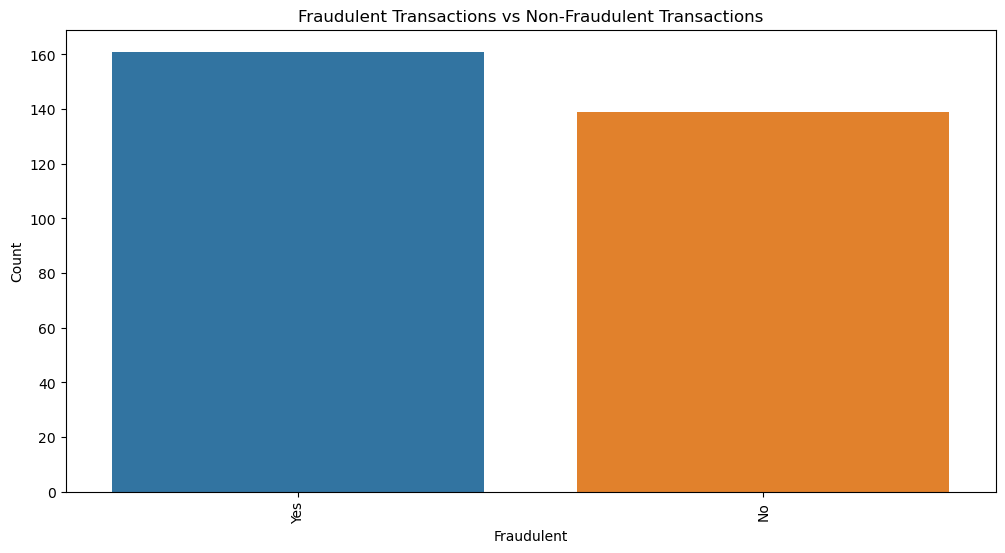

In [132]:
fraud_counts = df['Fraudulent'].value_counts().reset_index()
fraud_counts.columns = ['Fraudulent', 'Count']

plt.figure(figsize=(12, 6))
sns.barplot(x="Fraudulent", y="Count", data=fraud_counts)
plt.xticks(rotation=90)
plt.title("Fraudulent Transactions vs Non-Fraudulent Transactions")
plt.show()

In [133]:
df.drop(columns = ['Transaction ID', 'User ID', 'Transaction Date'], inplace = True)

In [134]:
from sklearn.model_selection import train_test_split

In [135]:
X = df.drop(columns = ['Fraudulent'])
y = df['Fraudulent']

In [136]:
from sklearn import tree
from sklearn.model_selection import cross_validate

In [137]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns you want to encode
categorical_cols = [
    'Merchant Name', 'Card Type', 'Transaction Method', 'Country', 
    'Merchant Category', 'Transaction Location',
    'User Gender', 'Transaction Time'
]

# Ensure all categorical columns are encoded correctly
for col in categorical_cols:
    # Initialize LabelEncoder for each column
    le = LabelEncoder()

    # Convert column values to string to avoid issues with non-string types
    X[col] = X[col].astype(str)

    # Apply LabelEncoder and transform the column to numeric
    X[col] = le.fit_transform(X[col])

# Now you can fit the model on X



In [138]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2 )
print("X_train", X_train.shape)
print("X_test", X_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

X_train (240, 11)
X_test (60, 11)
y_train (240,)
y_test (60,)


In [139]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [140]:
cvs = cross_validate(clf, X, y, cv = 10, return_estimator=True)

In [141]:
score = cvs['test_score'].mean()
score

0.5799999999999998

[Text(0.3472222222222222, 0.9, 'Transaction Time <= 25.0\ngini = 0.495\nsamples = 240\nvalue = [108, 132]'),
 Text(0.1111111111111111, 0.7, 'Account Balance <= 11413.74\ngini = 0.287\nsamples = 23\nvalue = [4, 19]'),
 Text(0.05555555555555555, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.16666666666666666, 0.5, 'Transaction Amount <= 536.29\ngini = 0.172\nsamples = 21\nvalue = [2, 19]'),
 Text(0.1111111111111111, 0.3, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(0.2222222222222222, 0.3, 'User Age <= 58.0\ngini = 0.408\nsamples = 7\nvalue = [2, 5]'),
 Text(0.16666666666666666, 0.1, '\n  (...)  \n'),
 Text(0.2777777777777778, 0.1, '\n  (...)  \n'),
 Text(0.5833333333333334, 0.7, 'Account Balance <= 4509.16\ngini = 0.499\nsamples = 217\nvalue = [104, 113]'),
 Text(0.3888888888888889, 0.5, 'Transaction Time <= 62.5\ngini = 0.266\nsamples = 19\nvalue = [3, 16]'),
 Text(0.3333333333333333, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.4444444444444444, 0.3, 'Acc

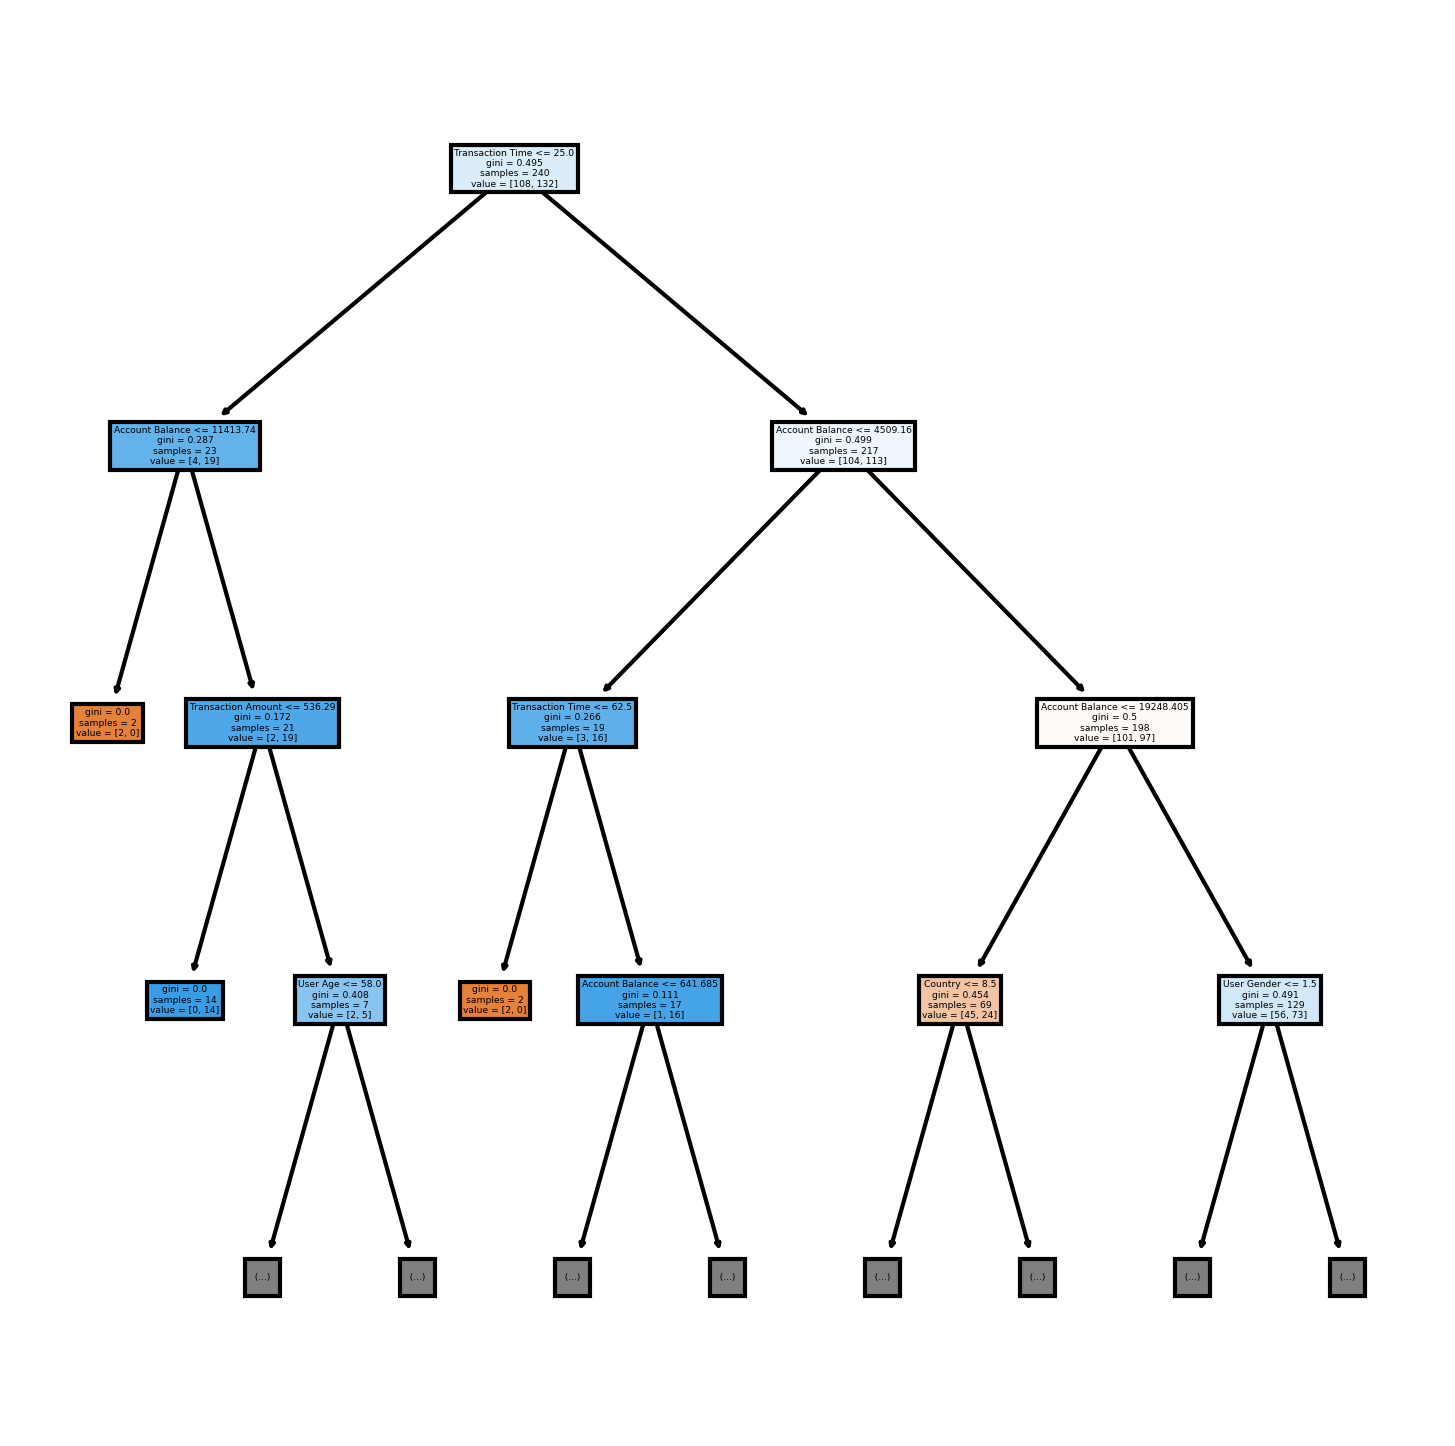

In [142]:
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (6,6), dpi=300)
tree.plot_tree(clf, max_depth=3, feature_names=X.columns.tolist(), filled=True)


In [143]:
from sklearn import svm

clf = svm.SVC()
clf.fit(X_train, y_train)

cvs = cross_validate(clf, X, y, cv = 10, return_estimator=True)

In [144]:
score = cvs['test_score'].mean()
score

0.5199999999999999

In [145]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

cvs = cross_validate(clf, X, y, cv = 10, return_estimator=True)
score = cvs['test_score'].mean()
score

0.5599999999999999